In [1]:
%matplotlib inline
import matplotlib.pyplot as plot
from IPython import display
from __future__ import print_function
import os
import numpy as np

In [2]:
w2v_model_fn = '../../models/word2vec_pt_br.npz'

if not os.path.isfile(w2v_model_fn):
    wvec_words = '/Users/rubens/Development/Datasets/word2vec/portuguese/pt.tsv'

    words = []
    vectors = []
    word_index = {}
    for line in open(wvec_pt):
        line = line.rstrip()
        if line[0] != ' ':
            i, w, vec0 = line.split(maxsplit=2)
            assert int(i) == len(words)
            assert vec0[0] == '[', vec0
            words.append(w)
            vv = [float(x) for x in vec0[1:].split()]
        elif line[-1] == ']':
            vv += [float(x) for x in line[:-1].split()]
            vectors.append(vv)
        else:
            vv += [float(x) for x in line.split()]
            
    words = np.array(words)
    vectors = np.array(vects)
    np.savez_compressed(w2v_model_fn, words=words, vectors=vectors)

else:
    dd = np.load(w2v_model_fn)
    words = dd['words']
    vectors = dd['vectors']

w2v = {}
w2i = {}
for i, w in enumerate(words):
    w2v[w] = vectors[i]
    w2i[w] = i
    
EMBEDDING_DIM = vectors.shape[1]

In [3]:
print(words[:20])
print(words[-20:])

['de' 'a' 'e' 'o' 'do' 'em' 'que' 'da' 'um' 'uma' 'com' 'no' 'é' 'para'
 'na' 'os' 'por' 'foi' 'como' 'as']
['lança-chamas' 'neotropical' 'empurrados' 'sheep' 'vives' 'etnólogo'
 'obregón' 'pilota' 'separate' 'clarificar' 'tombadas' 'bz' 'lauenburg'
 'dubrovnik' 'macy' 'yorktown' 'indicativos' 'empregaram' 'cours' 'satu']


In [106]:
def dist(i, j, vec=vectors):
    return np.sqrt(((vec[i] - vec[j]) ** 2).sum(-1))

def printdist(wa, wb):
    i = w2i[wa]
    j = w2i[wb]
    print('{:10s} - {:10s}: {:.3f}'.format(wa, wb, dist(i, j)))

printdist('inglaterra', 'londres')
printdist('frança', 'paris')
printdist('itália', 'roma')
printdist('portugal', 'lisboa')
printdist('espanha', 'madri')
print()
printdist('inglaterra', 'frança')
printdist('londres', 'paris')


inglaterra - londres   : 17.573
frança     - paris     : 17.157
itália     - roma      : 17.202
portugal   - lisboa    : 18.042
espanha    - madri     : 16.485

inglaterra - frança    : 13.462
londres    - paris     : 13.569


In [101]:
np.set_printoptions(precision=1, linewidth=120)
somewords = ['inglaterra', 'londres', 'frança', 'paris', 'roma', 'espanha', 
             'madri', 'portugal', 'lisboa', 'itália', 'cavalo', 'boi']
someindexes = [w2i[w] for w in somewords]
somevectors = vectors[someindexes]

n = len(somewords)
D = dist(*np.meshgrid(np.arange(n), np.arange(n)))
print(somewords, end='\n\n')
print(D)

['inglaterra', 'londres', 'frança', 'paris', 'roma', 'espanha', 'madri', 'portugal', 'lisboa', 'itália', 'cavalo', 'boi']

[[  0.   21.6  14.9  25.3  20.3  15.9  24.6  21.5  25.4  26.5  20.5  27. ]
 [ 21.6   0.   21.2  28.6  28.6  24.2  26.2  19.2  30.6  19.6  26.3  32. ]
 [ 14.9  21.2   0.   23.6  22.1  18.5  20.6  23.2  25.4  26.8  19.6  26.6]
 [ 25.3  28.6  23.6   0.   18.7  27.3  27.3  32.5  17.   33.5  29.7  22.5]
 [ 20.3  28.6  22.1  18.7   0.   26.1  29.7  24.8  22.7  32.5  27.4  21. ]
 [ 15.9  24.2  18.5  27.3  26.1   0.   26.7  27.2  28.   28.9  22.3  25.1]
 [ 24.6  26.2  20.6  27.3  29.7  26.7   0.   30.6  29.1  29.8  27.7  33.1]
 [ 21.5  19.2  23.2  32.5  24.8  27.2  30.6   0.   33.4  24.8  28.1  33.3]
 [ 25.4  30.6  25.4  17.   22.7  28.   29.1  33.4   0.   31.6  31.   26.2]
 [ 26.5  19.6  26.8  33.5  32.5  28.9  29.8  24.8  31.6   0.   31.1  36. ]
 [ 20.5  26.3  19.6  29.7  27.4  22.3  27.7  28.1  31.   31.1   0.   30.1]
 [ 27.   32.   26.6  22.5  21.   25.1  33.1  33.3  2

In [85]:
from sklearn.manifold import TSNE

w2v_model_tsne_fn = '../../models/word2vec_pt_br_tsne_1.npz'
N = 5000

def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plot.figure(figsize=(18, 18))  #in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i,:]
        plot.scatter(x, y)
        plot.annotate(label,
                      xysom=(x, y),
                      xytext=(5, 2),
                      textcoords='offset points',
                      ha='right',
                      va='bottom')
    plot.savefig(filename)

if not os.path.isfile(w2v_model_tsne_fn):
    tsne = TSNE(perplexity=500, n_components=2, init='pca', n_iter=1000, verbose=2)
    vectors2d = tsne.fit_transform(vectors[:N])
    np.savez_compressed(w2v_model_tsne_fn, words=words, vectors2d=vectors2d)
else:
    dd = np.load(w2v_model_tsne_fn)
    vectors2d = dd['vectors2d']
    words = dd['words']


[t-SNE] Computing pairwise distances...
[t-SNE] Computing 1501 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 7.469808
[t-SNE] Iteration 25: error = 0.5593532, gradient norm = 2084810.5000000
[t-SNE] Iteration 25: error difference 0.000000. Finished.
[t-SNE] Iteration 50: error = 0.5593532, gradient norm = 740931116466176.0000000
[t-SNE] Iteration 50: error difference 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: 0.559353
[t-SNE] Iteration 75: error = 0.5593532, gradient norm = 6959080363703108894720.0000000
[t-SNE] Iteration 75: error difference 0.000000. Finished.
[t-SNE] Error after 75 iterations: 0.559353


(-1e+22, 1e+22)

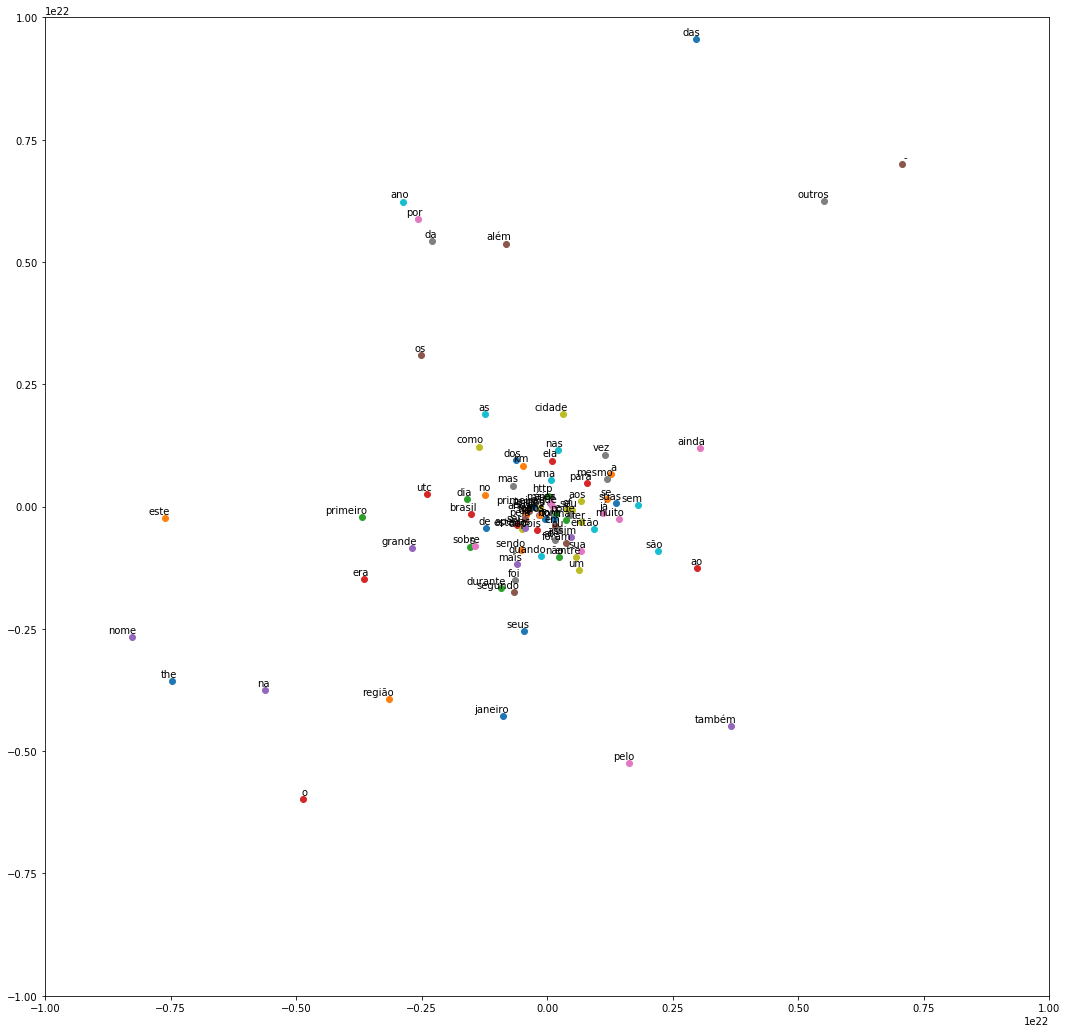

In [84]:
plot_with_labels(vectors2d[:100,:], words[:100])
plot.xlim(-1e22, 1e22)
plot.ylim(-1e22, 1e22)

[[  -44.    20.]
 [ 1032.    14.]
 [    8.   -30.]
 [   45.   -19.]
 [ -206.   -40.]
 [   34.   -68.]
 [ -149.   -24.]
 [ -226.   -97.]
 [ -109.   -90.]
 [-2178.  -279.]]


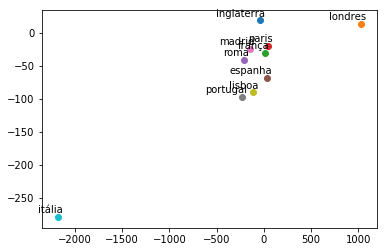

In [69]:
somewords = ['inglaterra', 'londres', 'frança', 'paris', 'roma', 'espanha', 'madrid', 'portugal', 'lisboa', 'itália']
someindexes = [w2i[w] for w in somewords]
somevectors2d = vectors2d[someindexes]

for w, (x, y) in zip(somewords, somevectors2d/1e19):
    plot.scatter(x, y)
    plot.annotate(w,
                  xy=(x, y),
                  xytext=(5, 2),
                  textcoords='offset points',
                  ha='right',
                  va='bottom')

print(somevectors2d/1e19)